# Reading data:

In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
outdir = 'Combined_forceplots_v2'
w0 = 1.0
path_prefix = '/Users/emmanuelmacb/Library/CloudStorage/OneDrive-WestVirginiaUniversity/1 - Active Projects/1.01 - Fluid Simulations/1.01A - Fluid Project Updates/rundata'
gfields = ['375','225','150','105','0']
final_path = f'{path_prefix}/run25024'
os.chdir(final_path)

# Extracting Data:

In [3]:
axes_dat = np.load('25024_axes.npz')

In [4]:
xx = axes_dat['xx']
yy = axes_dat['yy']
zz = axes_dat['zz']

In [5]:
angular_force_dat = np.load('angular_force_dat_25024.npz')

In [6]:
d_sep = angular_force_dat['d_sep']

In [7]:
fdat = []
os.chdir(outdir)
for i in range(len(gfields)):
    fdat.append(np.load(f'f_{gfields[i]}_t0.npz'))

In [8]:
fdat_375_t0 = fdat[0]
fdat_225_t0 = fdat[1]
fdat_150_t0 = fdat[2]
fdat_105_t0 = fdat[3]
fdat_0_t0 = fdat[4]

In [9]:
fx_375_t0 = fdat_375_t0['fx_375_t0']
fy_375_t0 = fdat_375_t0['fy_375_t0']
fz_375_t0 = fdat_375_t0['fz_375_t0']

In [10]:
fx_225_t0 = fdat_225_t0['fx_225_t0']
fy_225_t0 = fdat_225_t0['fy_225_t0']
fz_225_t0 = fdat_225_t0['fz_225_t0']

In [11]:
fx_150_t0 = fdat_150_t0['fx_150_t0']
fy_150_t0 = fdat_150_t0['fy_150_t0']
fz_150_t0 = fdat_150_t0['fz_150_t0']

In [12]:
fx_105_t0 = fdat_105_t0['fx_105_t0']
fy_105_t0 = fdat_105_t0['fy_105_t0']
fz_105_t0 = fdat_105_t0['fz_105_t0']

In [13]:
fx_0_t0 = fdat_0_t0['fx_0_t0']
fy_0_t0 = fdat_0_t0['fy_0_t0']
fz_0_t0 = fdat_0_t0['fz_0_t0']

# Heat Map of $f_x$ for 375 G guide field:

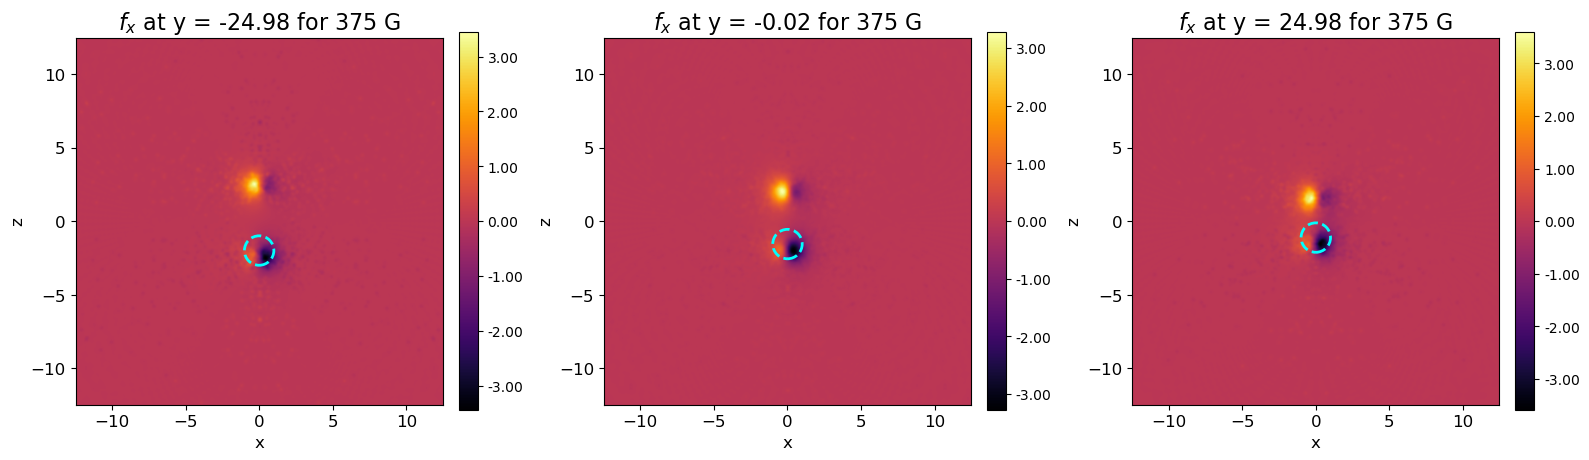

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6), dpi=100)
image_cont(fx_375_t0[:,0,:], xx, zz, fig=fig, ax=ax[0], xlabel='x', ylabel='z', 
                       title=f'$f_x$ at y = {yy[0]:.2f} for 375 G', colmp='inferno')
ax[0].add_patch(plt.Circle((0, -d_sep[0]), w0, color='cyan', fill=False, 
    linewidth=2.0, linestyle='dashed'))

image_cont(fx_375_t0[:,511,:], xx, zz, fig=fig, ax=ax[1], xlabel='x', ylabel='z', 
                       title=f'$f_x$ at y = {yy[511]:.2f} for 375 G', colmp='inferno')
ax[1].add_patch(plt.Circle((0, -d_sep[511]), w0, color='cyan', fill=False, 
    linewidth=2.0, linestyle='dashed'))

image_cont(fx_375_t0[:,1023,:], xx, zz, fig=fig, ax=ax[2], xlabel='x', ylabel='z', 
                       title=f'$f_x$ at y = {yy[1023]:.2f} for 375 G', colmp='inferno')
ax[2].add_patch(plt.Circle((0, -d_sep[1023]), w0, color='cyan', fill=False, 
    linewidth=2.0, linestyle='dashed'))
plt.tight_layout()

## Zooming in on the lower flux rope:

In [44]:
xmin, xmax = -3, 3
zmin, zmax = -5, 1
x_st_c, x_en_c = np.searchsorted(xx, [xmin, xmax])
z_st_c, z_en_c = np.searchsorted(zz, [zmin, zmax])
xx_c = xx[x_st_c:x_en_c] # bounding box axes
zz_c = zz[z_st_c:z_en_c]

Slicing the data:

In [45]:
fx_375_t0_c = fx_375_t0[x_st_c:x_en_c, :, z_st_c:z_en_c]
fz_375_t0_c = fz_375_t0[x_st_c:x_en_c, :, z_st_c:z_en_c]

In [47]:
# fx_max_375_t0 = np.max(fx_375_t0_c, axis=(0,2))

In [48]:
# fx_375_t0_zly = fx_375_t0_c[:,0,:] # lower y
# fx_375_t0_zmy = fx_375_t0_c[:,511,:] # middle y
# fx_375_t0_zuy = fx_375_t0_c[:,1023,:] # upper y
# # find indices of max values
# xin_ly, zin_ly = np.unravel_index(fx_375_t0_zly.argmax(), fx_375_t0_zly.shape)
# xin_my, zin_my = np.unravel_index(fx_375_t0_zmy.argmax(), fx_375_t0_zmy.shape)
# xin_uy, zin_uy = np.unravel_index(fx_375_t0_zuy.argmax(), fx_375_t0_zuy.shape) 

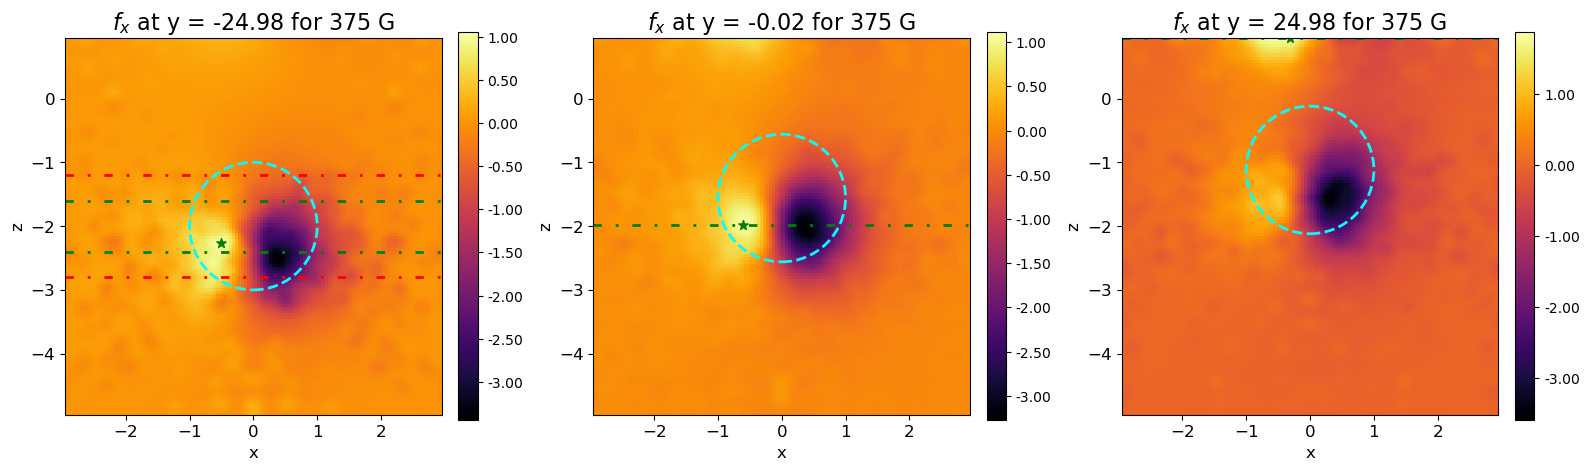

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6), dpi=100)
# first axis
image_cont(fx_375_t0_zly, xx_z, zz_z, fig=fig, ax=ax[0], xlabel='x', ylabel='z', 
                       title=f'$f_x$ at y = {yy[0]:.2f} for 375 G', colmp='inferno')
ax[0].add_patch(plt.Circle((0, -d_sep[0]), w0, color='cyan', fill=False, 
    linewidth=2.0, linestyle='dashed'))
ax[0].axhline(y=-d_sep[0]+0.4, color='green', linestyle = (0, (3, 5, 1, 5)), 
    linewidth=2.0, label=f'z = {zz_z[zin_ly]:.2f}')
ax[0].axhline(y=-d_sep[0]+0.8, color='red', linestyle = (0, (3, 5, 1, 5)), 
    linewidth=2.0, label=f'z = {zz_z[zin_ly]:.2f}')
ax[0].axhline(y=-d_sep[0]-0.4, color='green', linestyle = (0, (3, 5, 1, 5)), 
    linewidth=2.0, label=f'z = {zz_z[zin_ly]:.2f}')
ax[0].axhline(y=-d_sep[0]-0.8, color='red', linestyle = (0, (3, 5, 1, 5)), 
    linewidth=2.0, label=f'z = {zz_z[zin_ly]:.2f}')
ax[0].scatter(xx_z[xin_ly], zz_z[zin_ly], color='green', s=50, marker='*', 
    label=f'Max Value: {fx_max_375_t0[0]:02.2f}')

# second axis
image_cont(fx_375_t0_z[:,511,:], xx_z, zz_z, fig=fig, ax=ax[1], xlabel='x', ylabel='z', 
                       title=f'$f_x$ at y = {yy[511]:.2f} for 375 G', colmp='inferno')
ax[1].add_patch(plt.Circle((0, -d_sep[511]), w0, color='cyan', fill=False, 
    linewidth=2.0, linestyle='dashed'))
ax[1].axhline(y=zz_z[zin_my], color='green', linestyle = (0, (3, 5, 1, 5)), 
    linewidth=2.0, label=f'z = {zz_z[zin_my]:.2f}')
ax[1].scatter(xx_z[xin_my], zz_z[zin_my], color='green', s=50, marker='*', 
    label=f'Max Value: {fx_max_375_t0[511]:02.2f}')

# third axis
image_cont(fx_375_t0_z[:,1023,:], xx_z, zz_z, fig=fig, ax=ax[2], xlabel='x', ylabel='z', 
                       title=f'$f_x$ at y = {yy[1023]:.2f} for 375 G', colmp='inferno')
ax[2].add_patch(plt.Circle((0, -d_sep[1023]), w0, color='cyan', fill=False, 
    linewidth=2.0, linestyle='dashed'))
ax[2].axhline(y=zz_z[zin_uy], color='green', linestyle = (0, (3, 5, 1, 5)), 
    linewidth=2.0, label=f'z = {zz_z[zin_uy]:.2f}')
ax[2].scatter(xx_z[xin_uy], zz_z[zin_uy], color='green', s=50, marker='*', 
    label=f'Max Value: {fx_max_375_t0[1023]:02.2f}')

plt.tight_layout()

In [42]:
xx_z[xin_uy], zz_z[zin_uy]

(-0.3178279999999223, 0.9517000000000859)